In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

# Principal Component Analysis (PCA) – in Python, step by step

### By Petyo Karatov

###### Abstract:
Principal Component Analysis (PCA) is a simple yet popular and useful linear transformation technique that is used in numerous applications, such as stock market predictions, the analysis of gene expression data, and many more. In this article, we will see that PCA is not just a "black box", and we are going to unravel its internals in 6 general steps.

### Introduction:
The main purposes of a principal component analysis are the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.

Here, our desired outcome of the principal component analysis is to project a feature space (our dataset consisting of n
d-dimensional samples) onto a smaller subspace that represents our data “well”. A possible application would be a pattern classification task, where we want to reduce the computational costs and the error of parameter estimation by reducing the number of dimensions of our feature space by extracting a subspace that describes our data “best”. 

Principal Component Analysis does just what it advertises; it finds the principal components of the dataset. PCA transforms the data into a new, lower-dimensional subspace—into a new coordinate system—. In the new coordinate system, the first axis corresponds to the first principal component, which is the component that explains the greatest amount of the variance in the data.<br/><br/><br/>

### PCA and Dimensionality Reduction

Let’s assume that our goal is to reduce the dimensions of a d-dimensional dataset by projecting it onto a (k)-dimensional subspace (where k<d). So, how do we know what size we should choose for k, and how do we know if we have a feature space that represents our data “well”?
Later, we will compute eigenvectors (the components) from our data set and collect them in a so-called scatter-matrix (or alternatively calculate them from the covariance matrix). Each of those eigenvectors is associated with an eigenvalue, which tell us about the “length” or “magnitude” of the eigenvectors. If we observe that all the eigenvalues are of very similar magnitude, this is a good indicator that our data is already in a “good” subspace. Or if some of the eigenvalues are much much higher than others, we might be interested in keeping only those eigenvectors with the much larger eigenvalues, since they contain more information about our data distribution. Vice versa, eigenvalues that are close to 0 are less informative and we might consider in dropping those when we construct the new feature subspace.

### A Summary of the PCA Approach

Listed below are the 6 general steps for performing a principal component analysis, which we will investigate in the following sections.

1. Take the whole dataset consisting of $\mathit{d}$-dimensional samples ignoring the class labels
2. Compute the $\mathit{d}$-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
3. Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
4. Compute eigenvectors ($\mathit{e}_{1},\mathit{e}_{2},...,\mathit{e}_{d}$) and corresponding eigenvalues ($\mathit{\lambda}_{1},\mathit{\lambda}_{2},...,\mathit{\lambda}_{d}$)
5. Sort the eigenvectors by decreasing eigenvalues and choose $\mathit{k}$ eigenvectors with the largest eigenvalues to form a $\mathit{d×k}$ dimensional matrix $\mathit{W}$(where every column represents an eigenvector)
6. Use this $\mathit{d×k}$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: $\mathit{y = W^{T}}$x $\mathit{x}$ (where $\mathit{x}$ is a $\mathit{d}$×1-dimensional vector representing one sample, and $\mathit{y}$ is the transformed $\mathit{k}$×1-dimensional sample in the new subspace.)

### Generating some 3-dimensional sample data

For the following example, we will generate 40 3-dimensional samples randomly drawn from a multivariate Gaussian distribution. 

Here, we will assume that the samples stem from two different classes, where one half (i.e., 20) samples of our data set are labeled ω1 (class 1) and the other half ω2 (class 2).

$\mu_{1} = \begin{bmatrix}0\\ 0\\ 0\end{bmatrix}$   $\mu_{2} = \begin{bmatrix}1\\ 1\\ 1\end{bmatrix}$  (sample means)

$\sum_{1} = \begin{bmatrix}1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 1\end{bmatrix}$   $\sum_{2} = \begin{bmatrix}1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 1\end{bmatrix}$  (covariance matrices)

#### Why are we chosing a 3-dimensional sample?

The problem of multi-dimensional data is its visualization, which would make it quite tough to follow our example principal component analysis (at least visually). We could also choose a 2-dimensional sample data set for the following examples, but since the goal of the PCA in an “Diminsionality Reduction” application is to drop at least one of the dimensions, I find it more intuitive and visually appealing to start with a 3-dimensional dataset that we reduce to an 2-dimensional dataset by dropping 1 dimension.

numpy.random.multivariate_normal draw random samples from a multivariate normal distribution.

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix. These parameters are analogous to the mean (average or “center”) and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.

The mean is a coordinate in N-dimensional space, which represents the location where samples are most likely to be generated. This is analogous to the peak of the bell curve for the one-dimensional or univariate normal distribution.

Covariance indicates the level to which two variables vary together. From the multivariate normal distribution, we draw N-dimensional samples, $ X = [x_1, x_2, ... x_N] $. The covariance matrix element $ C_{ij} $ is the covariance of $ x_{i} $ and $ x_{j} $. The element $ C_{ii} $ is the variance of $ x_{i} $ (i.e. its “spread”)

In [3]:
np.random.seed(2342347823) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

print(class1_sample)
print("\n" + "*"*50 + "\n")
print(class2_sample)

[[ 0.74767719 -0.31954032 -0.46346075  0.73954214 -0.00490912 -1.29460636
  -1.44111524  1.6487362  -0.4209399  -0.24255096  0.50554994 -1.20782059
   1.13632096 -1.4644507  -0.45996727 -0.85954223  0.633352    0.86802144
   1.2014511  -0.30355842]
 [-1.60720079  0.75220297 -0.6692755   1.58995385 -0.04697873  0.69413251
  -0.73755004 -1.47294235 -1.63112564 -0.56193599 -0.93696072 -0.19572056
   1.13736346 -1.57299184 -0.7514009  -0.34902665 -0.39969807 -0.61923989
   0.06227453  0.8829847 ]
 [ 1.52267425  1.5579562   0.47377795  0.44244499  0.39789244  0.3427591
   0.17602762 -0.05891299  1.85653383 -1.73003687  0.54093427 -1.48714512
   1.33100887 -1.44175854 -0.80664333 -0.25127998  1.21961256  0.35179132
   1.21050575  0.04448934]]

**************************************************

[[ 2.34150722  1.27886022  0.21658265 -1.10504648  0.78059076  0.59379938
   1.93144384  1.74821053  0.31303676  2.16712851  1.32022445  0.91417966
   1.95635445  0.21190781  1.69641018  0.99130361 -0

Using the code above, we created two 3×20 datasets - one dataset for each class ω1 and ω2 -
where each column can be pictured as a 3-dimensional vector $\boldsymbol{x} = \begin{bmatrix}x_{1}\\ x_{2}\\ x_{3}\end{bmatrix}$ so that our dataset will have the form
$\boldsymbol{X} = \begin{bmatrix}
x_{1_{1}} & x_{1_{2}} & \cdots  & x_{1_{20}}\\ 
x_{2_{1}} & x_{2_{2}} & \cdots  & x_{2_{20}}\\
x_{3_{1}} & x_{3_{2}} & \cdots  & x_{3_{20}}
\end{bmatrix}$

Just to get a rough idea how the samples of our two classes ω1
and ω2 are distributed, let us plot them in a 3D scatter plot.

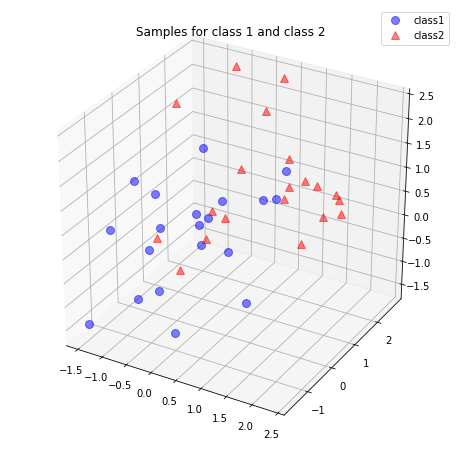

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

## 1. Taking the whole dataset ignoring the class labels

Because we don’t need class labels for the PCA analysis, let us merge the samples for our 2 classes into one 3×40-dimensional array.

In [5]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

print(all_samples)

[[ 0.74767719 -0.31954032 -0.46346075  0.73954214 -0.00490912 -1.29460636
  -1.44111524  1.6487362  -0.4209399  -0.24255096  0.50554994 -1.20782059
   1.13632096 -1.4644507  -0.45996727 -0.85954223  0.633352    0.86802144
   1.2014511  -0.30355842  2.34150722  1.27886022  0.21658265 -1.10504648
   0.78059076  0.59379938  1.93144384  1.74821053  0.31303676  2.16712851
   1.32022445  0.91417966  1.95635445  0.21190781  1.69641018  0.99130361
  -0.11616676 -0.04505591 -0.43140524 -0.51638664]
 [-1.60720079  0.75220297 -0.6692755   1.58995385 -0.04697873  0.69413251
  -0.73755004 -1.47294235 -1.63112564 -0.56193599 -0.93696072 -0.19572056
   1.13736346 -1.57299184 -0.7514009  -0.34902665 -0.39969807 -0.61923989
   0.06227453  0.8829847   0.88211168  0.97422581  0.56172958  1.21762519
   1.02568903  0.45249711  1.66811235  0.62462566  2.76652299  0.21166106
   2.34312756  1.54756863  0.0679229  -0.19592863  2.06120914  1.56453264
   0.68119012 -0.7075768  -0.85234     2.44397166]
 [ 1.52267

## 2. Computing the d-dimensional mean vector

Mean is simply the average value of all x’s in the set X, which is found by dividing the sum of all data points by the number of data points, n. For the d-dimensional sample data the mean vector will be the vector for mean for all dimensions. The formula ror mean is: $$ \boldsymbol{\overline{X}} = \frac{\sum_{i=1}^{n}\boldsymbol{X}_{i}}{n} $$
The mean vector is a d-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [21]:
# mean for every dimensions:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])
#the mean vector for the dataset:
mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print('Mean Vector:\n', mean_vector)


mean_vec = np.mean(all_samples.T, axis=0)
print(mean_vec.T)

Mean Vector:
 [[0.3811417 ]
 [0.32263355]
 [0.66053239]]
[0.3811417  0.32263355 0.66053239]


## 3.1 Computing the Scatter Matrix

 The scatter matrix is computed by the following equation:
$ S = \sum_{i=1}^{n}(\boldsymbol{X_{i} - m})(\boldsymbol{X_{i} - m})^{T} $
where $ \boldsymbol{m} $ is the mean vector 

In [26]:
scatter_matrix = np.zeros((3,3))
n = 0
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)


Scatter Matrix:
 [[42.81911841 14.20554424 13.2057807 ]
 [14.20554424 52.7743939  19.30703194]
 [13.2057807  19.30703194 40.04774914]]


## 3.2 Computing the Covariance Matrix (alternatively to the scatter matrix)

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a d×d matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:
$$ \sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij} - m_{j})(x_{ik} - m_{k}) $$ 
We can summarize the calculation of the covariance matrix via the following matrix equation:
$ \sum = \frac{1}{n-1}((\boldsymbol{X - m})(\boldsymbol{X - m})^{T}) $
where $ \boldsymbol{m} $ is the mean vector

Alternatively, instead of calculating the scatter matrix, we could also calculate the covariance matrix using the in-built numpy.cov() function. The equations for the covariance matrix and scatter matrix are very similar, the only difference is, that we use the scaling factor $\frac{1}{N-1}$ (here: $\frac{1}{40-1} = \frac{1}{39}$) for the covariance matrix. Thus, their <b>eigenspaces</b> will be identical (identical eigenvectors, only the eigenvalues are scaled differently by a constant factor).
$$ \sum_{i} = \begin{bmatrix}
\sigma_{11}^{2} & \sigma_{12}^{2} & \sigma_{13}^{2}\\ 
\sigma_{21}^{2} & \sigma_{22}^{2} & \sigma_{23}^{2}\\
\sigma_{31}^{2} & \sigma_{32}^{2} & \sigma_{33}^{2}
\end{bmatrix} $$


Variance and covariance are often displayed together in a variance-covariance matrix, (aka, a covariance matrix). The variances appear along the diagonal and covariances appear in the off-diagonal elements.

In [8]:
cov_mat = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    cov_mat += ((all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)) / (all_samples.shape[1] - 1)
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.09792611 0.36424472 0.33860976]
 [0.36424472 1.35318959 0.4950521 ]
 [0.33860976 0.4950521  1.02686536]]


In [9]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.09792611 0.36424472 0.33860976]
 [0.36424472 1.35318959 0.4950521 ]
 [0.33860976 0.4950521  1.02686536]]


You can see because dot(Xi,Xj) is same as dot(Xj,Xi) the matrix is symmetric and in the diagonal are the variance values and other elements are covariance values. The formula for covariance is $ Cov(X, Y)= \frac{1}{n-1}\sum_{i=1}^{n}((\boldsymbol{X_{i} - \overline{X}})(\boldsymbol{Y_{i} - \overline{Y}})) $ and for variance $ \sigma^{2} = \frac{1}{n-1}\sum_{i=1}^{n}(\boldsymbol{X_{i} - \overline{X}})^2 $

## 4. Computing eigenvectors and corresponding eigenvalues

#### Quick Introduction
<b>Eigenvector</b> — Every vector (list of numbers) has a direction when it is plotted on a XY chart. Eigenvectors are those vectors when a linear transformation (such as multiplying it to a scalar) is performed on them then their direction does not change. 

<b>Eigenvalue</b> — The scalar that is used to transform (stretch) an Eigenvector.

To show that the eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix, let us put an assert statement into the code. Also, we will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix.

In [10]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    print(eig_vec_sc[:,i].reshape(1,3).shape)
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector sc {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvector cov {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')


(1, 3)
Eigenvector sc 1: 
[[0.48670275]
 [0.69439611]
 [0.53003253]]
Eigenvector cov 1: 
[[0.48670275]
 [0.69439611]
 [0.53003253]]
Eigenvalue 1 from scatter matrix: 77.46812733657116
Eigenvalue 1 from covariance matrix: 1.986362239399262
Scaling factor:  38.99999999999997
----------------------------------------
(1, 3)
Eigenvector sc 2: 
[[ 0.83120195]
 [-0.5547751 ]
 [-0.03644042]]
Eigenvector cov 2: 
[[ 0.83120195]
 [-0.5547751 ]
 [-0.03644042]]
Eigenvalue 2 from scatter matrix: 32.75886004294653
Eigenvalue 2 from covariance matrix: 0.8399707703319627
Scaling factor:  38.999999999999986
----------------------------------------
(1, 3)
Eigenvector sc 3: 
[[-0.26874476]
 [-0.45829972]
 [ 0.84719397]]
Eigenvector cov 3: 
[[-0.26874476]
 [-0.45829972]
 [ 0.84719397]]
Eigenvalue 3 from scatter matrix: 25.414274072745812
Eigenvalue 3 from covariance matrix: 0.6516480531473285
Scaling factor:  39.0
----------------------------------------


Let us quickly check that the eigenvector-eigenvalue calculation is correct and satisfy the equation
$ Σ\nu =\lambda\nu $ where 
$Σ=Covariancematrix $ ,
$\nu=Eigenvector $ ,
$λ=Eigenvalue $


In [11]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=13, err_msg='', verbose=True)


And before we move on to the next step, just to satisfy our own curiosity, we plot the eigenvectors centered at the sample mean.

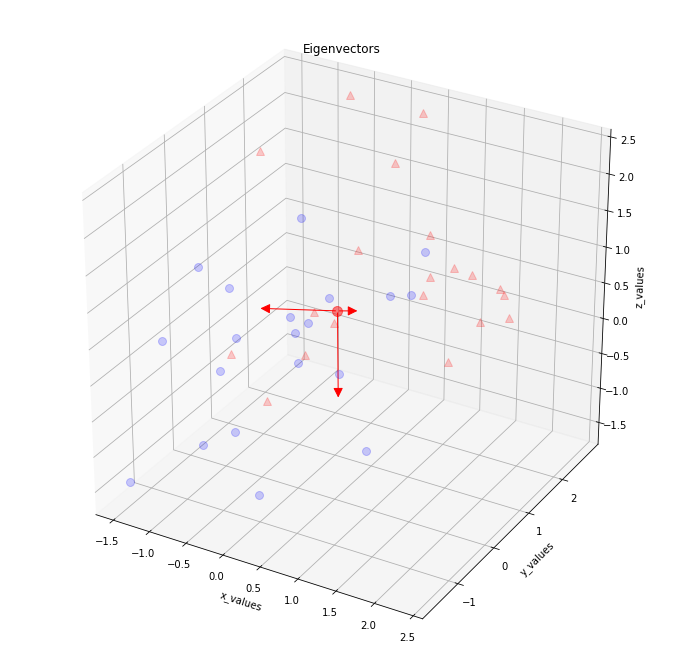

In [32]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.2, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.2, color='red', label='class2')
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

## 5.1. Sorting the eigenvectors by decreasing eigenvalues

We started with the goal to reduce the dimensionality of our feature space, i.e., projecting the feature space via PCA onto a smaller subspace, where the eigenvectors will form the axes of this new feature subspace. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which we can confirm by the following code:

In [13]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.
The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors.

In [14]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]
print(eig_pairs)
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])


[(77.46812733657116, array([0.48670275, 0.69439611, 0.53003253])), (32.75886004294653, array([ 0.83120195, -0.5547751 , -0.03644042])), (25.414274072745812, array([-0.26874476, -0.45829972,  0.84719397]))]
77.46812733657116
32.75886004294653
25.414274072745812


## 5.2. Choosing k eigenvectors with the largest eigenvalues

For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our $\mathit{d×k}$-dimensional eigenvector matrix $\mathit{W}$.

In [15]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)


Matrix W:
 [[ 0.48670275  0.83120195]
 [ 0.69439611 -0.5547751 ]
 [ 0.53003253 -0.03644042]]


## 6. Transforming the samples onto the new subspace

In the last step, we use the 2×3-dimensional matrix $\mathit{W}$ that we just computed to transform our samples onto the new subspace via the equation $\mathit{y = W^{T}} × \mathit{x}$. Where $\mathit{y}$ is 2x40 matrix of our transformed samples

Also we can subtract the mean vectors from the samples X to center the data at the coordinate system’s origin.

In [16]:
transformed = matrix_w.T.dot(all_samples - mean_vector)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."
print(transformed)

[[-0.70471239  0.43293127 -1.19883404  0.93886334 -0.58375704 -0.72605394
  -1.87988811 -1.01122864 -1.11313843 -2.18487405 -0.87749842 -2.27163433
   1.28866744 -3.32885237 -1.93282625 -1.55353273 -0.08250215 -0.58071036
   0.50995832 -0.27066263  1.46527205  1.12229634 -0.08381823  0.64450031
   1.64672804  0.63672398  1.73011934  1.32133446  2.55942094  1.34816461
   1.45329593  1.02774053  0.52586504 -0.6731249   1.80978783  1.52509229
  -0.16243918 -1.4093284  -1.3753577   2.01801227]
 [ 1.34387223 -0.85342518 -0.14494336 -0.3972274  -0.1062638  -1.58740364
  -0.90884452  2.07598471  0.37362235  0.05943594  0.80655811 -0.95491634
   0.15128216 -0.40580588 -0.04981935 -0.62541173  0.58999617  0.93847397
   0.80624221 -0.85754407  1.31064227  0.36868529 -0.2577555  -1.78315436
  -0.12429906  0.07425641  0.53933744  0.93809052 -1.47398753  1.50785624
  -0.3123856  -0.23084439  1.45502198  0.16287675  0.1313215  -0.20695304
  -0.60063706  0.25072783 -0.0122699  -1.9903924 ]]


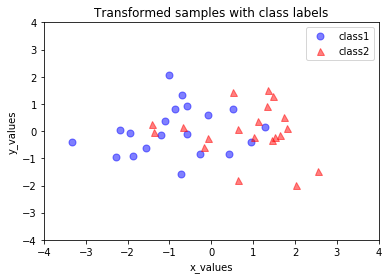

In [17]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()


## Using the PCA() class from the sklearn.decomposition library to confirm our results

In order to make sure that we have not made a mistake in our step by step approach, we will use another library that doesn’t rescale the input data by default.
Here, we will use the PCA class from the scikit-learn machine-learning library. The documentation can be found here:
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

For our convenience, we can directly specify to how many components we want to reduce our input dataset via the n_components parameter.

Next, we just need to use the .fit_transform() in order to perform the dimensionality reduction.

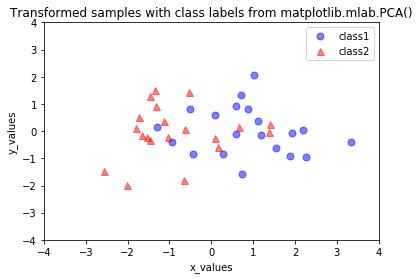

In [18]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()


The plot above seems to be the exact reflection image of the plot from out step by step approach. This is due to the fact that the signs of the eigenvectors can be either positive or negative, since the eigenvectors are scaled to the unit length 1, we can simply multiply the transformed data by ×(−1) for x axis to revert the reflection image.

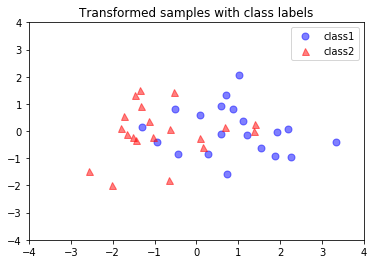

In [19]:
# step by step PCA
transformed[0,0:40] = transformed[0,0:40] * (-1)
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])

plt.legend()
plt.title('Transformed samples with class labels')

plt.show()


## References used in research:
https://sebastianraschka.com/Articles/2014_pca_step_by_step.html
